In [22]:
import networkx as nx
from networkx import Graph
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from tqdm import tqdm

In [3]:
def draw_graph_with_edge_labels(g:Graph):
    pos = nx.spring_layout(g)
    nx.draw(g, pos, with_labels=True, node_size=700)
    edge_labels = nx.get_edge_attributes(g, 'weight')
    nx.draw_networkx_edge_labels(g, pos, edge_labels=edge_labels)

# Question 1

In [4]:
g_8 = nx.Graph()
g_8.add_nodes_from([1,2,3,4,5,6])
g_8.add_edge(1,2,weight=5)
g_8.add_edge(1,6,weight=4)
g_8.add_edge(2,3,weight=4)
g_8.add_edge(2,4,weight=3)
g_8.add_edge(3,6,weight=3)
g_8.add_edge(3,4,weight=1)
g_8.add_edge(4,5,weight=2)
g_8.add_edge(5,6,weight=1)

In [5]:
dist, path = nx.single_source_dijkstra(g_8, 1)

for node in g_8.nodes:
    print("source node: 1, target node: ", node, ", shortest distance: ", dist[node], ", path: ", path[node])

source node: 1, target node:  1 , shortest distance:  0 , path:  [1]
source node: 1, target node:  2 , shortest distance:  5 , path:  [1, 2]
source node: 1, target node:  3 , shortest distance:  7 , path:  [1, 6, 3]
source node: 1, target node:  4 , shortest distance:  7 , path:  [1, 6, 5, 4]
source node: 1, target node:  5 , shortest distance:  5 , path:  [1, 6, 5]
source node: 1, target node:  6 , shortest distance:  4 , path:  [1, 6]


# Question 2

In [6]:
g_7 = nx.Graph()
g_7.add_nodes_from([1,2,3,4,5,6,7,8])
g_7.add_edge(1,2)
g_7.add_edge(2,3)
g_7.add_edge(3,6)
g_7.add_edge(5,6)
g_7.add_edge(5,7)
g_7.add_edge(4,5)
g_7.add_edge(4,8)

In [7]:
bfs = nx.bfs_tree(g_7, 3)
print("BFS visited node order:", bfs.nodes)

BFS visited node order: [3, 2, 6, 1, 5, 7, 4, 8]


In [8]:
dfs = nx.dfs_tree(g_7, 3)
print("DFS visited node order:", dfs.nodes)

DFS visited node order: [3, 2, 1, 6, 5, 7, 4, 8]


# Question 3

In [9]:
g_3 = nx.DiGraph()
g_3.add_nodes_from([1,2,3,4,5,6])
g_3.add_edge(1,2)
g_3.add_edge(2,1)
g_3.add_edge(3,2)
g_3.add_edge(3,6)
g_3.add_edge(6,3)
g_3.add_edge(4,3)
g_3.add_edge(6,5)
g_3.add_edge(5,6)
g_3.add_edge(5,4)

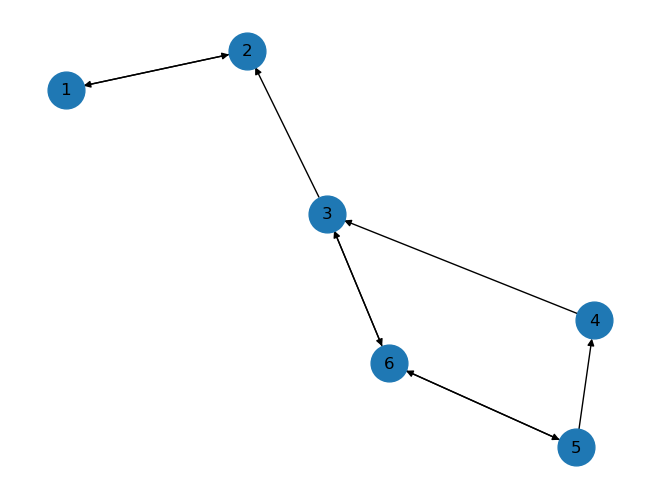

In [10]:
draw_graph_with_edge_labels(g_3)

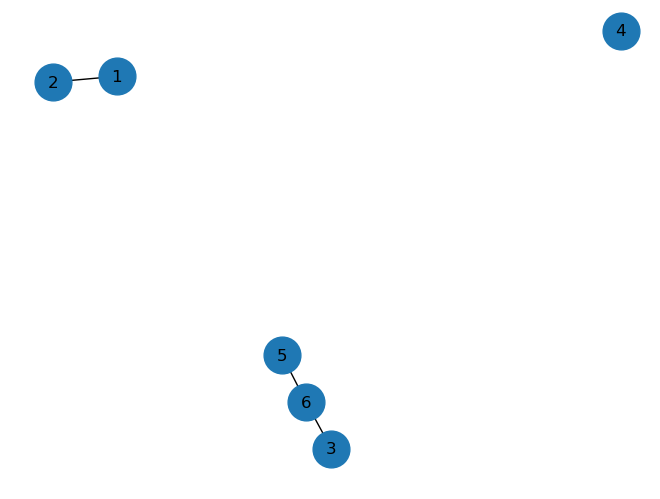

In [11]:
g_3_reciprocal_true = g_3.to_undirected(reciprocal=True)
draw_graph_with_edge_labels(g_3_reciprocal_true)

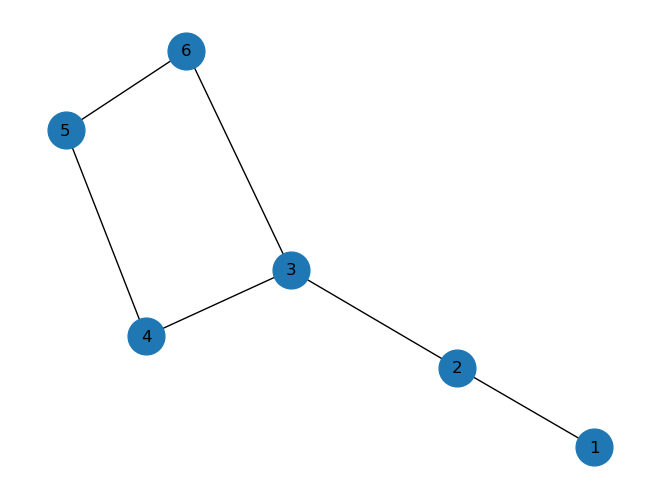

In [12]:
g_3_reciprocal_false = g_3.to_undirected(reciprocal=False)
draw_graph_with_edge_labels(g_3_reciprocal_false)

The difference between `reciprocal=True` and `reciprocal=False`, is that `reciprocal=True` only connects nodes in the resulting undirected graph if they were connected by both directions in the original directed graph, while `reciprocal=False` connects the nodes in the new undirected graph if there was any connection between the nodes in the original directed graph irrelevant of the direction.

# Question 4

In [13]:
twitch_df = pd.read_csv("../data/Twitch_ENGB_edges.csv")
print(twitch_df.head())
len(twitch_df)

   from    to
0  6194   255
1  6194   980
2  6194  2992
3  6194  2507
4  6194   986


35324

In [14]:
twitch_graph = nx.from_pandas_edgelist(twitch_df, source="from", target="to", create_using=nx.Graph())

In [15]:
original_node = 6194
# dictionary with key being the node and the value being list of (dist_from_original_node, frequency)
frequency = {original_node: [0,1]}
walk_length = 5
num_iters = 100

current_node = original_node

for _ in range(num_iters):
    current_node = original_node
    for t in range(walk_length):
        next_nodes = list(twitch_graph.neighbors(current_node))
        next_node = random.choice(next_nodes)
        if next_node in frequency:
            frequency[next_node][1] += 1
        else:
            dist_from_original_node = nx.shortest_path_length(twitch_graph, original_node, next_node)
            frequency[next_node] = [dist_from_original_node, 1]
        current_node = next_node


dist = np.array([v[0] for v in frequency.values()])
freq = np.array([v[1] for v in frequency.values()])

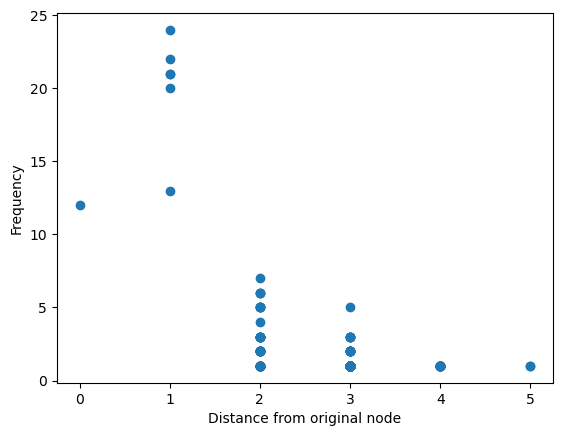

In [16]:
plt.xlabel("Distance from original node")
plt.ylabel("Frequency")
plt.plot(dist, freq, 'o')
plt.show()

In [17]:
print("Correlation coefficient between distance and frequency: ", np.corrcoef(dist, freq)[0,1]) 

Correlation coefficient between distance and frequency:  -0.5350819567629737


With the correlation coefficient, numbers closer to 0 indicate that there is no correlation between the variables. With the resulting correlation coefficient being -0.55, we can conclude that there is a negative linear correlation between distance and frequency of -0.55.

# Question 5

In [18]:
degrees = dict(twitch_graph.degree())
degrees = np.array([d for d in degrees.values()])

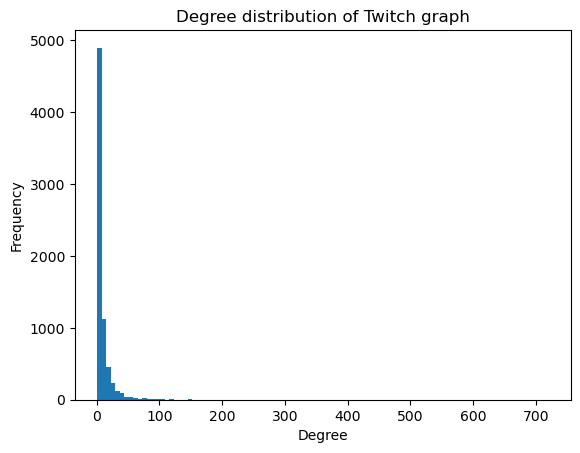

In [19]:
plt.hist(degrees, bins=100)
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.title("Degree distribution of Twitch graph")
plt.show()

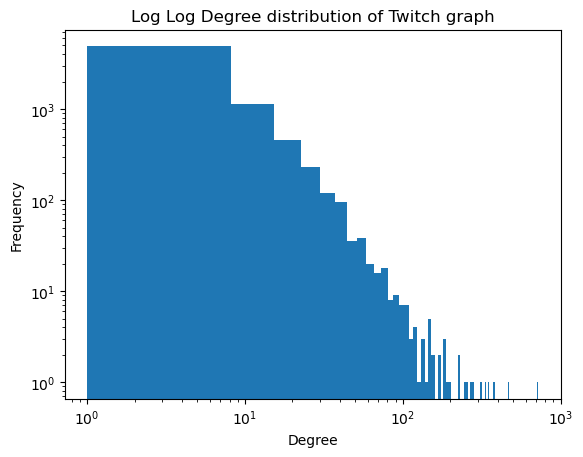

In [20]:
plt.hist(degrees, bins=100)
plt.yscale('log')
plt.xscale('log')
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.title("Log Log Degree distribution of Twitch graph")
plt.show()

Yes the distribution of the degrees does look like a power law distribution, and the loglog of the degree disribution does look linear. This is because in the twitch network and real networks in general, there are few nodes with very high degree in comparision, and a lot of nodes with very low degree. This results in a sparse graph that follows the power law distribution.

# Question 6

In [23]:
random_graph = nx.Graph()
random_graph.add_nodes_from(range(len(twitch_graph.nodes)))

for node in tqdm(twitch_graph.nodes):
    for node_2 in twitch_graph.nodes:
        if node != node_2:
            prob = np.random.rand()
            if prob < 0.5:
                random_graph.add_edge(node, node_2)

print(random_graph)


100%|██████████| 7126/7126 [01:32<00:00, 76.84it/s]

Graph with 7126 nodes and 19038262 edges


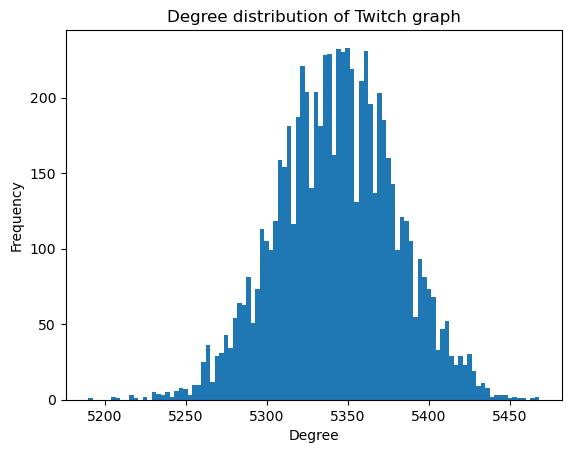

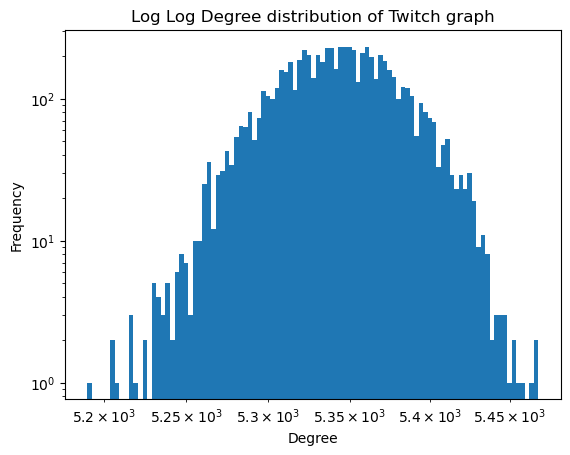

In [24]:
degrees = dict(random_graph.degree())
degrees = np.array([d for d in degrees.values()])

plt.hist(degrees, bins=100)
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.title("Degree distribution of Twitch graph")
plt.show()

plt.hist(degrees, bins=100)
plt.yscale('log')
plt.xscale('log')
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.title("Log Log Degree distribution of Twitch graph")
plt.show()

In comparison with the twitch graph from question five, this random graph seems to follow a more normal distribution in the original distribution, while the log log distribution follows a somewhat normal distribution that is definitely not linear.

# Question 7

In [48]:
job_graph = nx.DiGraph()

job_graph.add_node("v1", location="Salt Lake City", job="student", age=24, color="red")
job_graph.add_node("v2", location="Logan", job="student", color="red")
job_graph.add_node("v3", gender="female", job="CEO", color="yellow")
job_graph.add_node("v4", country="Japan", interests=["soccer"], color="green")
job_graph.add_node("v5", location="Pheonix", job="programmer", interests=["coding"], color="green")
job_graph.add_node("v6", location="Las Vegas", job="musician", interests=["music","movies"], color="yellow")

job_graph.add_edge("v1", "v2", weight=8)
job_graph.add_edge("v2", "v1", weight=6)
job_graph.add_edge("v3", "v2", weight=8)
job_graph.add_edge("v4", "v3", weight=10)
job_graph.add_edge("v3", "v6", weight=5)
job_graph.add_edge("v6", "v3", weight=2)
job_graph.add_edge("v5", "v4", weight=7)
job_graph.add_edge("v5", "v6", weight=13)
job_graph.add_edge("v6", "v5", weight=13)

In [83]:
for key, value in job_graph.nodes(data=True):
    print(key, value)

v1 {'location': 'Salt Lake City', 'job': 'student', 'age': 24, 'color': 'red'}
v2 {'location': 'Logan', 'job': 'student', 'color': 'red'}
v3 {'gender': 'female', 'job': 'CEO', 'color': 'yellow'}
v4 {'country': 'Japan', 'interests': ['soccer'], 'color': 'green'}
v5 {'location': 'Pheonix', 'job': 'programmer', 'interests': ['coding'], 'color': 'green'}
v6 {'location': 'Las Vegas', 'job': 'musician', 'interests': ['music', 'movies'], 'color': 'yellow'}


In [78]:
# I copied this code to draw edge labels on curved edges from stack overflow because networkx doesnt 
# natively support printing edge weights on curved edges, found here -> https://stackoverflow.com/questions/22785849/drawing-multiple-edges-between-two-nodes-with-networkx
def my_draw_networkx_edge_labels(
    G,
    pos,
    edge_labels=None,
    label_pos=0.5,
    font_size=10,
    font_color="k",
    font_family="sans-serif",
    font_weight="normal",
    alpha=None,
    bbox=None,
    horizontalalignment="center",
    verticalalignment="center",
    ax=None,
    rotate=True,
    clip_on=True,
    rad=0
):
    """Draw edge labels.

    Parameters
    ----------
    G : graph
        A networkx graph

    pos : dictionary
        A dictionary with nodes as keys and positions as values.
        Positions should be sequences of length 2.

    edge_labels : dictionary (default={})
        Edge labels in a dictionary of labels keyed by edge two-tuple.
        Only labels for the keys in the dictionary are drawn.

    label_pos : float (default=0.5)
        Position of edge label along edge (0=head, 0.5=center, 1=tail)

    font_size : int (default=10)
        Font size for text labels

    font_color : string (default='k' black)
        Font color string

    font_weight : string (default='normal')
        Font weight

    font_family : string (default='sans-serif')
        Font family

    alpha : float or None (default=None)
        The text transparency

    bbox : Matplotlib bbox, optional
        Specify text box properties (e.g. shape, color etc.) for edge labels.
        Default is {boxstyle='round', ec=(1.0, 1.0, 1.0), fc=(1.0, 1.0, 1.0)}.

    horizontalalignment : string (default='center')
        Horizontal alignment {'center', 'right', 'left'}

    verticalalignment : string (default='center')
        Vertical alignment {'center', 'top', 'bottom', 'baseline', 'center_baseline'}

    ax : Matplotlib Axes object, optional
        Draw the graph in the specified Matplotlib axes.

    rotate : bool (deafult=True)
        Rotate edge labels to lie parallel to edges

    clip_on : bool (default=True)
        Turn on clipping of edge labels at axis boundaries

    Returns
    -------
    dict
        `dict` of labels keyed by edge

    Examples
    --------
    >>> G = nx.dodecahedral_graph()
    >>> edge_labels = nx.draw_networkx_edge_labels(G, pos=nx.spring_layout(G))

    Also see the NetworkX drawing examples at
    https://networkx.org/documentation/latest/auto_examples/index.html

    See Also
    --------
    draw
    draw_networkx
    draw_networkx_nodes
    draw_networkx_edges
    draw_networkx_labels
    """
    import matplotlib.pyplot as plt
    import numpy as np

    if ax is None:
        ax = plt.gca()
    if edge_labels is None:
        labels = {(u, v): d for u, v, d in G.edges(data=True)}
    else:
        labels = edge_labels
    text_items = {}
    for (n1, n2), label in labels.items():
        (x1, y1) = pos[n1]
        (x2, y2) = pos[n2]
        (x, y) = (
            x1 * label_pos + x2 * (1.0 - label_pos),
            y1 * label_pos + y2 * (1.0 - label_pos),
        )
        pos_1 = ax.transData.transform(np.array(pos[n1]))
        pos_2 = ax.transData.transform(np.array(pos[n2]))
        linear_mid = 0.5*pos_1 + 0.5*pos_2
        d_pos = pos_2 - pos_1
        rotation_matrix = np.array([(0,1), (-1,0)])
        ctrl_1 = linear_mid + rad*rotation_matrix@d_pos
        ctrl_mid_1 = 0.5*pos_1 + 0.5*ctrl_1
        ctrl_mid_2 = 0.5*pos_2 + 0.5*ctrl_1
        bezier_mid = 0.5*ctrl_mid_1 + 0.5*ctrl_mid_2
        (x, y) = ax.transData.inverted().transform(bezier_mid)

        if rotate:
            # in degrees
            angle = np.arctan2(y2 - y1, x2 - x1) / (2.0 * np.pi) * 360
            # make label orientation "right-side-up"
            if angle > 90:
                angle -= 180
            if angle < -90:
                angle += 180
            # transform data coordinate angle to screen coordinate angle
            xy = np.array((x, y))
            trans_angle = ax.transData.transform_angles(
                np.array((angle,)), xy.reshape((1, 2))
            )[0]
        else:
            trans_angle = 0.0
        # use default box of white with white border
        if bbox is None:
            bbox = dict(boxstyle="round", ec=(1.0, 1.0, 1.0), fc=(1.0, 1.0, 1.0))
        if not isinstance(label, str):
            label = str(label)  # this makes "1" and 1 labeled the same

        t = ax.text(
            x,
            y,
            label,
            size=font_size,
            color=font_color,
            family=font_family,
            weight=font_weight,
            alpha=alpha,
            horizontalalignment=horizontalalignment,
            verticalalignment=verticalalignment,
            rotation=trans_angle,
            transform=ax.transData,
            bbox=bbox,
            zorder=1,
            clip_on=clip_on,
        )
        text_items[(n1, n2)] = t

    ax.tick_params(
        axis="both",
        which="both",
        bottom=False,
        left=False,
        labelbottom=False,
        labelleft=False,
    )

    return text_items

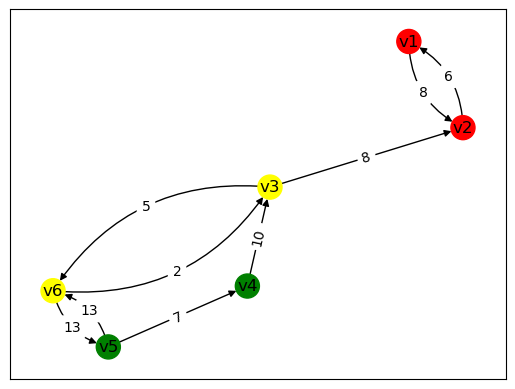

In [81]:
pos = nx.spring_layout(job_graph, seed=3)
arc_rad = 0.3

node_colors = nx.get_node_attributes(job_graph, 'color').values()
weights = nx.get_edge_attributes(job_graph, 'weight')

curved_edges = [edge for edge in job_graph.edges if reversed(edge) in job_graph.edges]
straight_edges = list(set(job_graph.edges) - set(curved_edges)) 
curved_edge_labels =  {edge:weights[edge] for edge in curved_edges}
straight_edge_labels = {edge:weights[edge] for edge in straight_edges}
# print(straight_edges)
# asdf

nx.draw_networkx_nodes(job_graph, pos=pos, node_color=node_colors)
nx.draw_networkx_labels(job_graph, pos=pos)
nx.draw_networkx_edges(job_graph, pos, edgelist=straight_edges)
nx.draw_networkx_edges(job_graph, pos, edgelist=curved_edges, connectionstyle=f'arc3,rad={arc_rad}')
my_draw_networkx_edge_labels(job_graph, pos,
                                   edge_labels=curved_edge_labels, rotate=False,
                                   rad=arc_rad)
nx.draw_networkx_edge_labels(job_graph, pos, edge_labels=straight_edge_labels)
plt.show()